In [ ]:
!pip install ultralytics opencv-python torch

In [ ]:
!pip install ultralytics opencv-python-headless torch matplotlib roboflow

In [ ]:
pip install ultralytics --no-cache-dir

In [ ]:
pip uninstall ultralytics -y

Found existing installation: ultralytics 8.3.86
Uninstalling ultralytics-8.3.86:
  Successfully uninstalled ultralytics-8.3.86


In [ ]:
pip show ultralytics

In [ ]:
pip install ultralytics --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 84.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.86


In [ ]:
pip install --upgrade torch torchvision torchaudio

In [ ]:
pip install numpy opencv-python matplotlib pandas seaborn

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # Load a sample YOLO model
model.info()  # Print model details

100%|██████████| 6.25M/6.25M [00:00<00:00, 142MB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)


0: 384x640 1 dog, 1 surfboard, 1 banana, 1839.9ms
Speed: 3.5ms preprocess, 1839.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 640x480 1 fire hydrant, 2387.9ms
Speed: 4.1ms preprocess, 2387.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 1 bird, 1894.3ms
Speed: 3.3ms preprocess, 1894.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 1 bird, 1908.9ms
Speed: 4.4ms preprocess, 1908.9ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)

0: 384x640 1 bear, 1 bottle, 2611.7ms
Speed: 3.6ms preprocess, 2611.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 1 bottle, 2001.8ms
Speed: 3.8ms preprocess, 2001.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 1 bird, 4 bottles, 2 cups, 2198.9ms
Speed: 4.0ms preprocess, 2198.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 352x640 1 vase, 1728.5ms
Speed: 3.1ms p

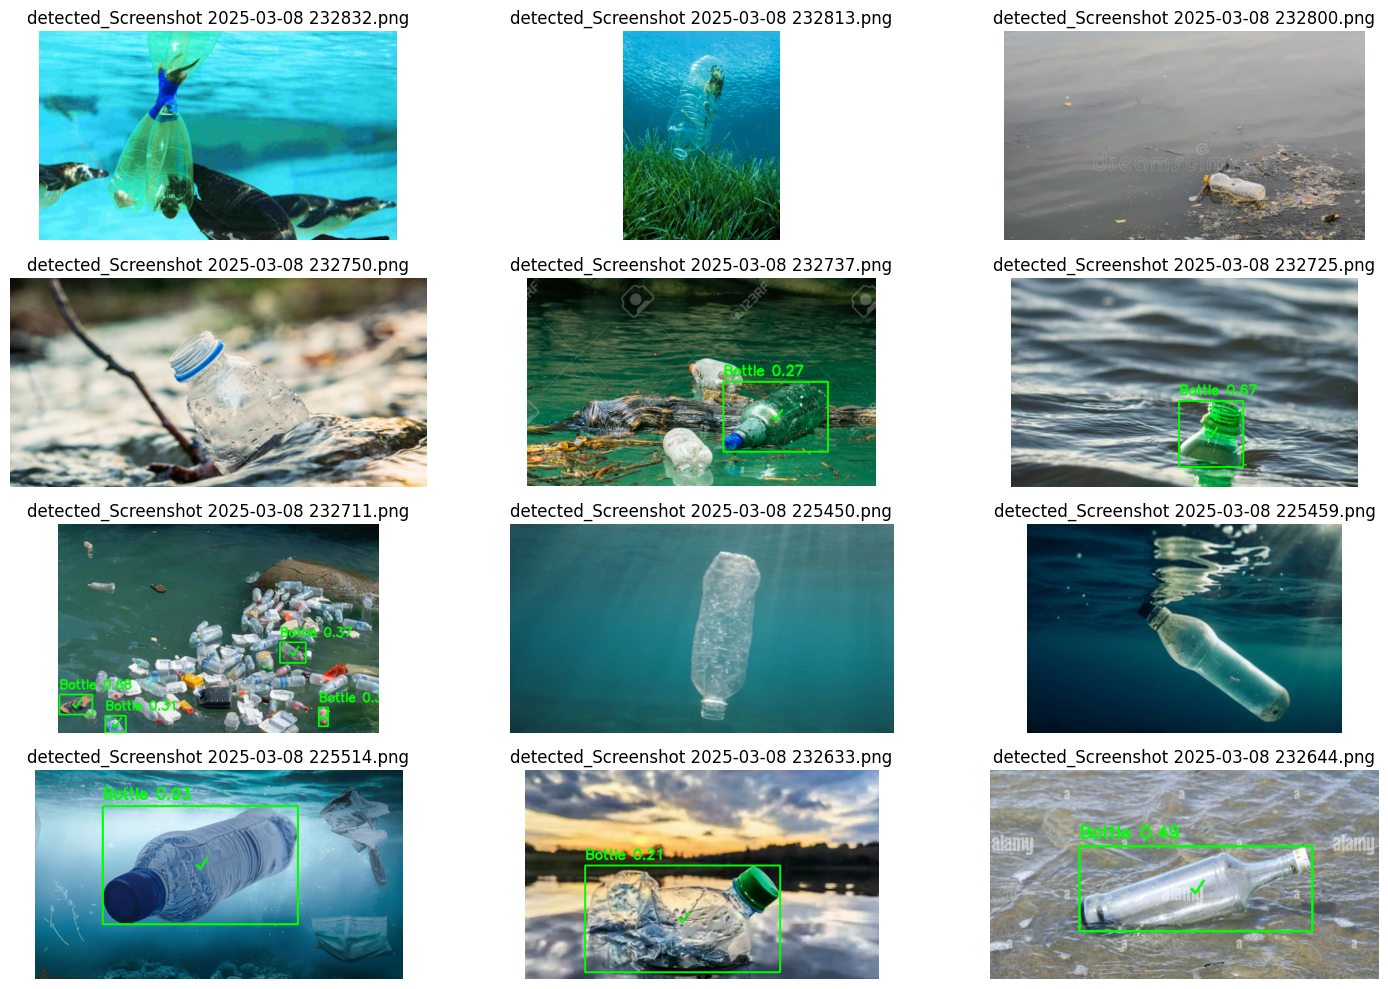

In [ ]:
import os

import cv2

import torch

import logging

import numpy as np

import matplotlib.pyplot as plt

from ultralytics import YOLO

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")


image_paths = [
    "/content/Screenshot 2025-03-08 232832.png",

    "/content/Screenshot 2025-03-08 232813.png",

    "/content/Screenshot 2025-03-08 232800.png",

    "/content/Screenshot 2025-03-08 232750.png",

    "/content/Screenshot 2025-03-08 232737.png",

    "/content/Screenshot 2025-03-08 232725.png",

    "/content/Screenshot 2025-03-08 232711.png",

    "/content/Screenshot 2025-03-08 225450.png",

    "/content/Screenshot 2025-03-08 225459.png",

    "/content/Screenshot 2025-03-08 225514.png",

    "/content/Screenshot 2025-03-08 232633.png",

    "/content/Screenshot 2025-03-08 232644.png"
]

def draw_checkmark(image, position, color=(0, 255, 0), thickness=2, size=10):

    """Draw a checkmark at the specified position on the image."""

    x, y = position

    pts = np.array([
        [x - size//2, y],
        [x, y + size//2],
        [x + size, y - size]
    ], np.int32)

    pts = pts.reshape((-1, 1, 2))

    cv2.polylines(image, [pts], isClosed=False, color=color, thickness=thickness)

def detect_bottles(model, image_path, confidence_threshold=0.2, output_dir="output"):

    """Enhanced bottle detection with multiple improvements"""

    try:

        os.makedirs(output_dir, exist_ok=True)

        img = cv2.imread(image_path)

        if img is None:

            logging.warning(f"Could not load image: {image_path}")

            return None

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        original_height, original_width = img.shape[:2]

        results = model(img,
                       conf=confidence_threshold,
                       imgsz=640,
                       augment=True,
                       agnostic_nms=True,
                       device=model.device)

        bottle_count = 0

        for result in results:

            boxes = result.boxes.xyxy.cpu().numpy()

            confidences = result.boxes.conf.cpu().numpy()

            class_ids = result.boxes.cls.cpu().numpy().astype(int)

            for box, confidence, class_id in zip(boxes, confidences, class_ids):

                if class_id == 39:

                    bottle_count += 1

                    x1, y1, x2, y2 = map(int, box)

                    x1 = max(0, min(x1, original_width-1))

                    y1 = max(0, min(y1, original_height-1))

                    x2 = max(0, min(x2, original_width-1))

                    y2 = max(0, min(y2, original_height-1))

                    center = ((x1 + x2) // 2, (y1 + y2) // 2)

                    draw_checkmark(img, center)

                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                    cv2.putText(img, f"Bottle {confidence:.2f}", (x1, y1 - 10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        logging.info(f"Detected {bottle_count} bottles in {os.path.basename(image_path)}")

        output_path = os.path.join(output_dir, f"detected_{os.path.basename(image_path)}")

        cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

        return output_path

    except Exception as e:

        logging.error(f"Error processing {image_path}: {e}")

        return None

def main():

    confidence_threshold = 0.2

    output_dir = "enhanced_detections"

    device = "cuda" if torch.cuda.is_available() else "cpu"

    model = YOLO("yolov8m.pt").to(device)

    logging.info(f"Model classes: {model.names}")

    if 39 not in model.names:

        logging.error("Bottle class missing in model!")

        return

    detected_images = []

    for idx, image_path in enumerate(image_paths):

        logging.info(f"\nProcessing image {idx+1}/{len(image_paths)}")

        output_path = detect_bottles(model, image_path, confidence_threshold, output_dir)

        if output_path:

            detected_images.append(output_path)


    plt.figure(figsize=(15, 10))

    for i, output_path in enumerate(detected_images):

        img = cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB)

        plt.subplot(4, 3, i+1)

        plt.imshow(img)

        plt.axis('off')

        plt.title(os.path.basename(output_path))

    plt.tight_layout()

    plt.show()

if __name__ == "__main__":

    main()
